<H1>Prédire le prix d'un logement<H1>

In [240]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt

Le dataset utilisé a été trouvé sur Kaggle à cet adresse: https://www.kaggle.com/datasets/shree1992/housedata. 

In [241]:
df = pd.read_csv('../machine_learning/data.csv')
df.head()
# ok

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


On peut voir qu'il est composé de 4.600 entrées et de 18 colonnes numériques et catégorielles. Il n'y a pas de valeurs null. Comme il y a des valeurs numériques, nous vérifierons plus tard s'il y a des valeurs à 0 qui pourraient être considérées comme null.

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

En annexe du rapport, vous trouverez la description/définition de chaque nom de colonne.

In [243]:
for column in df:
    print(f'{column} : {df[column].nunique()} valeur(s) différente(s)')
#     ok

date : 70 valeur(s) différente(s)
price : 1741 valeur(s) différente(s)
bedrooms : 10 valeur(s) différente(s)
bathrooms : 26 valeur(s) différente(s)
sqft_living : 566 valeur(s) différente(s)
sqft_lot : 3113 valeur(s) différente(s)
floors : 6 valeur(s) différente(s)
waterfront : 2 valeur(s) différente(s)
view : 5 valeur(s) différente(s)
condition : 5 valeur(s) différente(s)
sqft_above : 511 valeur(s) différente(s)
sqft_basement : 207 valeur(s) différente(s)
yr_built : 115 valeur(s) différente(s)
yr_renovated : 60 valeur(s) différente(s)
street : 4525 valeur(s) différente(s)
city : 44 valeur(s) différente(s)
statezip : 77 valeur(s) différente(s)
country : 1 valeur(s) différente(s)


Nous décidons de supprimer les colonnes date, country, street, city et statezip arbitrairement pour le dataframe de visualisation.

In [244]:
data_viz=df.drop(columns=['date', 'country', 'street', 'city', 'statezip'])
# ok

Nous rajoutons une colonne year dans laquelle nous stockerons la valeur maximale entre yr_built et yr_renovated afin de n'avoir que les années les plus récentes dans le modèle. Puis nous supprimons les colonnes yr_built et yr_renovated qui ne serviront plus.

In [245]:
data_viz = data_viz.assign(year=0)
# ok

In [246]:
def year_fusion(data):
    data['year'] = data[['yr_built','yr_renovated']].max(axis=1)
    # ok

In [247]:
year_fusion(data_viz)
data_viz=data_viz.drop(columns=['yr_built', 'yr_renovated'])
data_viz.head()
# ok

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,year
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,2005
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1992


<h2>Visualisation<h2>

In [248]:
def regression_viz(data):
    for i, col in enumerate(data.columns):
        plt.figure(i)
        sns.regplot(x=data.columns[i], y="price", data=data_viz)


In [249]:
# def viz_barplot(data):
#     return sns.barplot(data=data, x='view', y='price')


In [250]:
def boxplot_viz(data):
    for i in data:
        plt.figure(i)
        data.boxplot(i)

In [251]:
def distplot_viz(data):
    for i in data:
        plt.figure(figsize=(16,5))
        plt.figure(i)
        sns.distplot(data[i])
        plt.show()

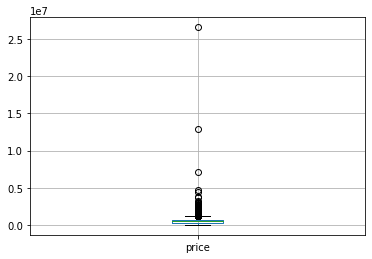

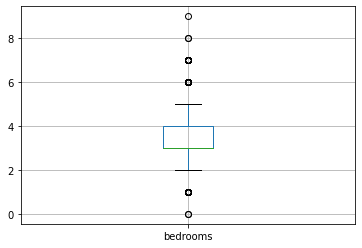

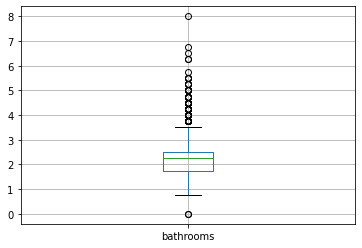

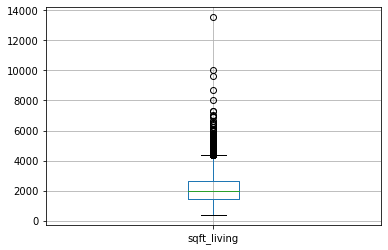

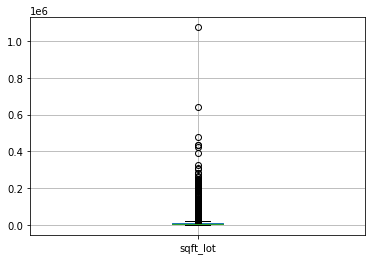

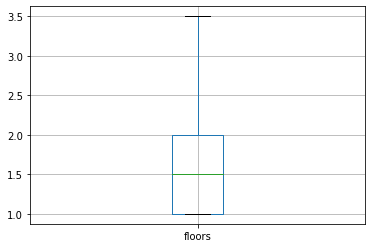

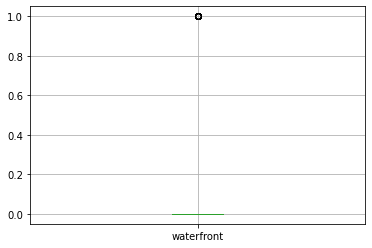

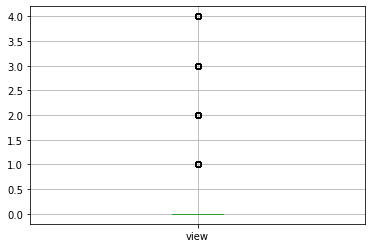

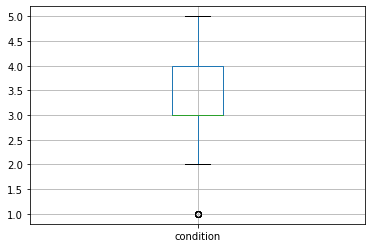

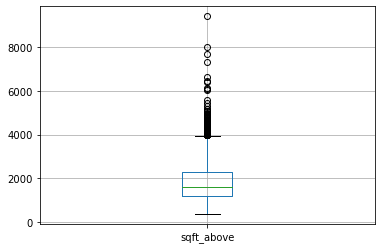

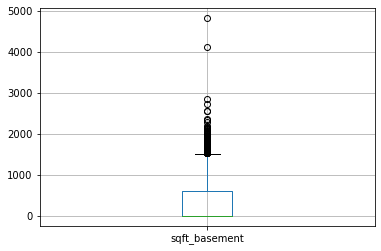

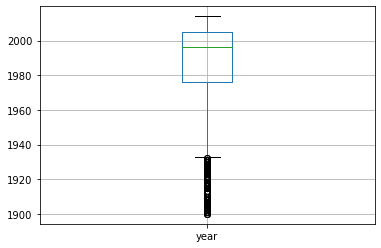

In [252]:
boxplot_viz(data_viz)

In [253]:
# suppression des outliers
drop_line_sqft = data_viz[data_viz['sqft_basement'] > 4000].index
data_viz.drop(drop_line_sqft , inplace=True)

drop_line_sqft = data_viz[data_viz['sqft_living'] > 8000].index
data_viz.drop(drop_line_sqft , inplace=True)

drop_line_sqft = data_viz[data_viz['sqft_lot'] > 60000].index
data_viz.drop(drop_line_sqft , inplace=True)

drop_line_sqft = data_viz[data_viz['bathrooms'] > 7].index
data_viz.drop(drop_line_sqft , inplace=True)

drop_line_price = data_viz[data_viz['price'] > 1000000].index
data_viz.drop(drop_line_price , inplace=True)
# ok

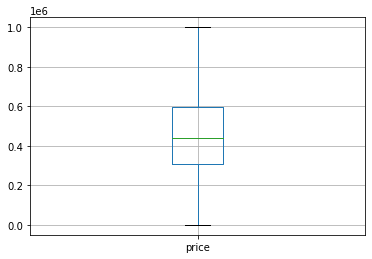

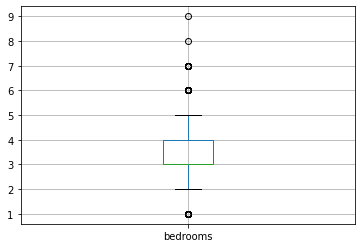

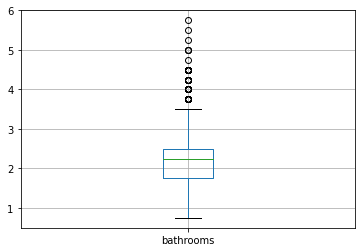

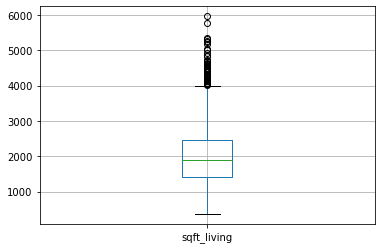

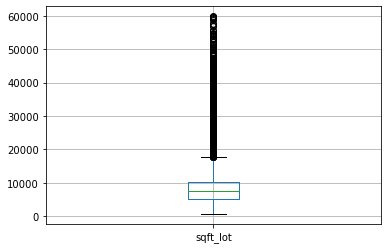

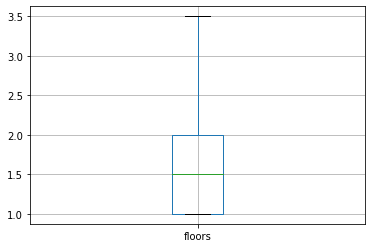

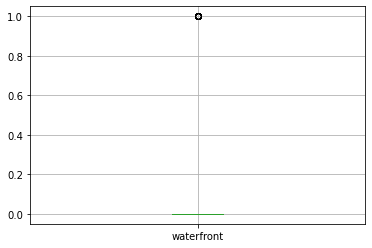

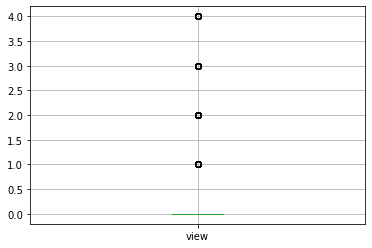

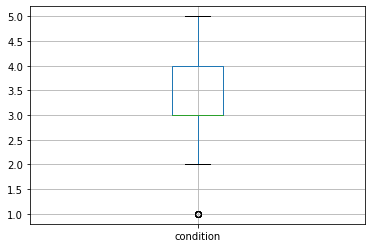

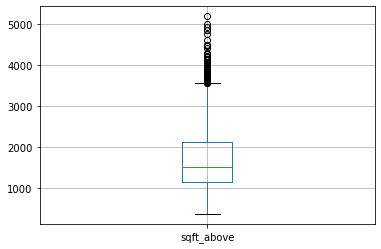

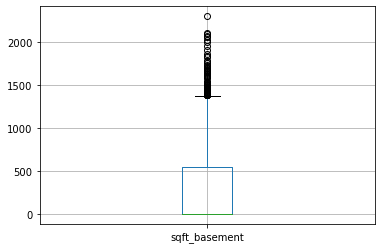

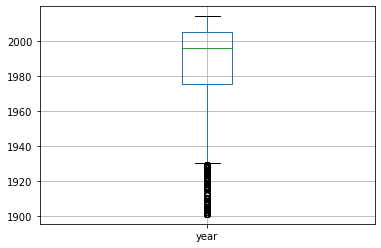

In [254]:
boxplot_viz(data_viz)

In [255]:
data_viz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4132 entries, 0 to 4599
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4132 non-null   float64
 1   bedrooms       4132 non-null   float64
 2   bathrooms      4132 non-null   float64
 3   sqft_living    4132 non-null   int64  
 4   sqft_lot       4132 non-null   int64  
 5   floors         4132 non-null   float64
 6   waterfront     4132 non-null   int64  
 7   view           4132 non-null   int64  
 8   condition      4132 non-null   int64  
 9   sqft_above     4132 non-null   int64  
 10  sqft_basement  4132 non-null   int64  
 11  year           4132 non-null   int64  
dtypes: float64(4), int64(8)
memory usage: 419.7 KB


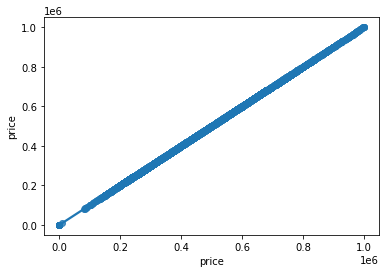

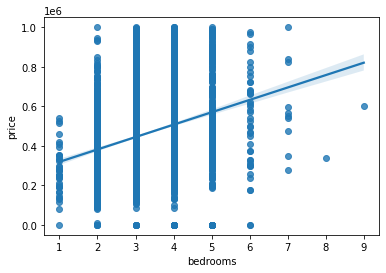

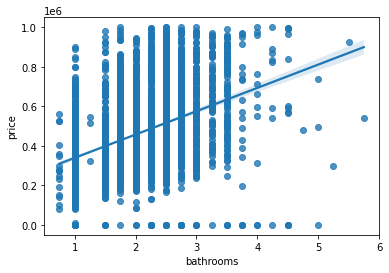

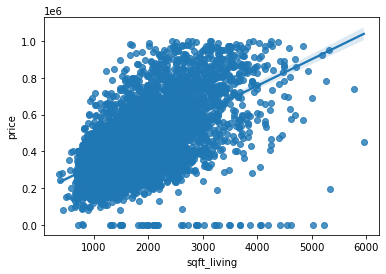

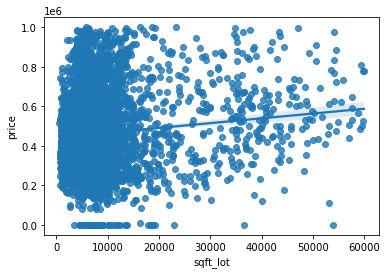

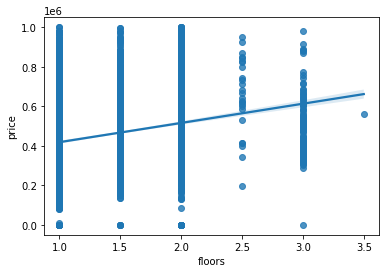

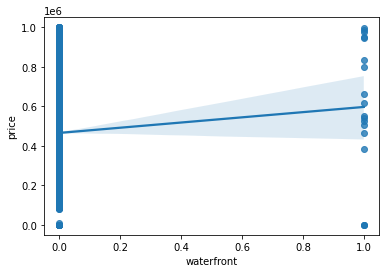

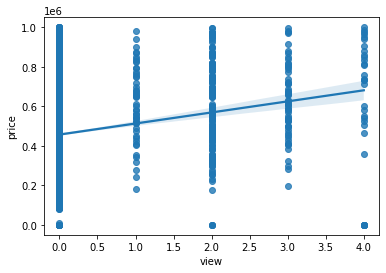

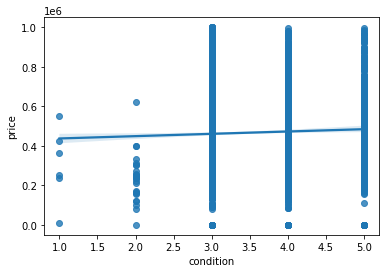

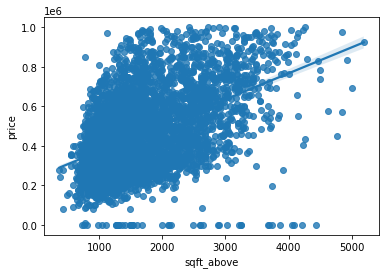

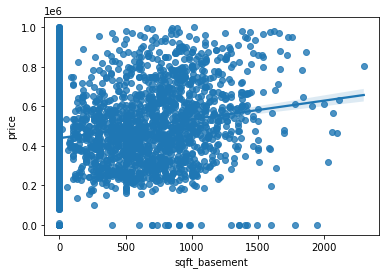

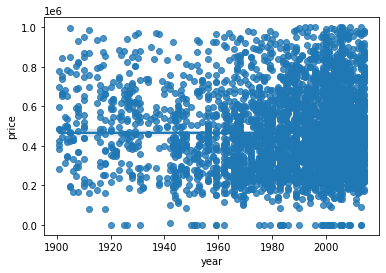

In [256]:
regression_viz(data_viz)

A présent il apparaît plus clairement que notre colonne <i>price</i> contient des valeurs à 0. Cette colonne allant devenir notre <i>y</i> pour la prédiction, il est donc nécessaire de supprimer les lignes correspondantes.

In [257]:
data_viz['price'].value_counts().sort_values

<bound method Series.sort_values of 0.0         46
300000.0    42
400000.0    29
440000.0    28
450000.0    28
            ..
439800.0     1
391000.0     1
298000.0     1
328500.0     1
220600.0     1
Name: price, Length: 1500, dtype: int64>

In [258]:
drop_zero_price = data_viz[data_viz['price'] == 0].index
data_viz.drop(drop_zero_price , inplace=True)
# ok

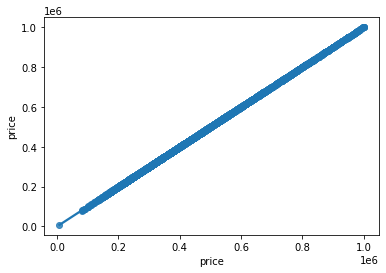

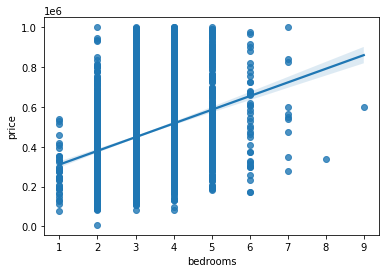

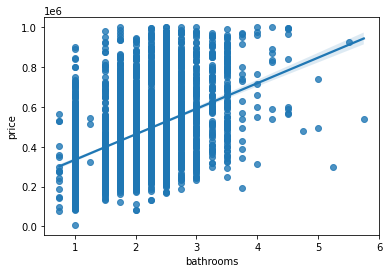

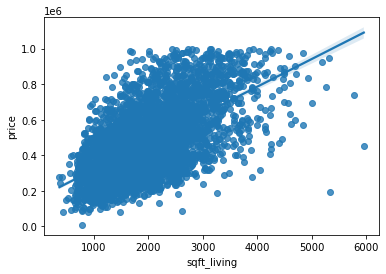

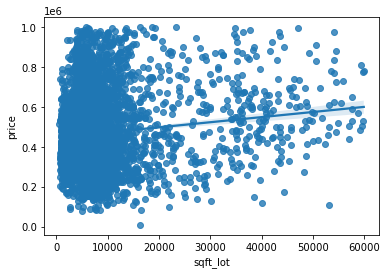

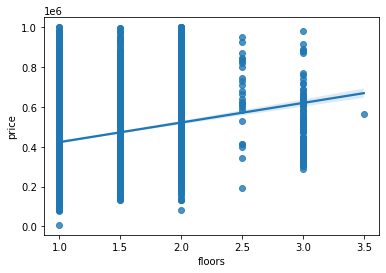

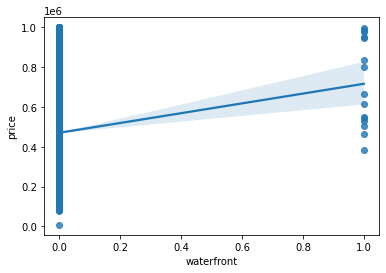

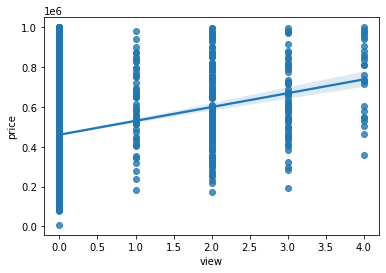

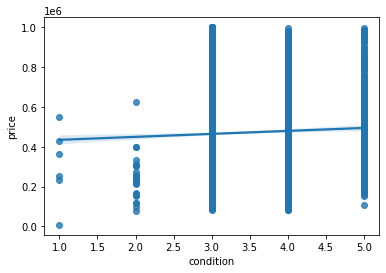

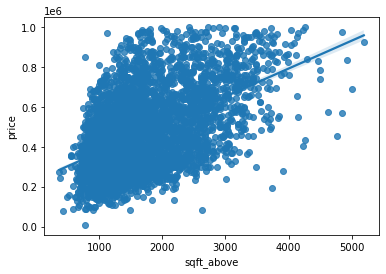

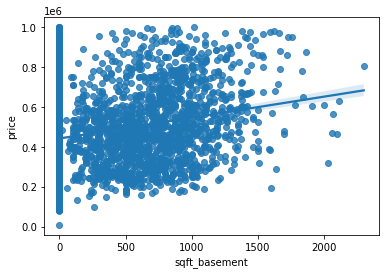

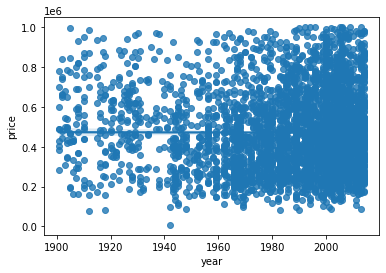

In [259]:
regression_viz(data_viz)

Maintenant on peut voir une corrélation entre les différentes features et le prix. Nous allons supprimer <i>condition</i> et <i>year</i> qui semblent n'avoir qu'un faible impact sur le prix.

In [260]:
data_viz = data_viz.drop(columns=['condition', 'year'])
data_viz.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,1340,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,1930,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,1000,1000
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,1140,800
5,490000.0,2.0,1.00,880,6380,1.0,0,0,880,0


<AxesSubplot:>

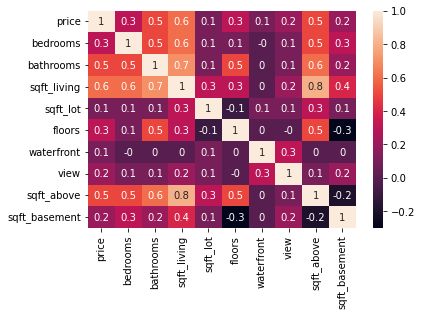

In [261]:
#etude de la correlation
matrice_corr = data_viz.corr().round(1)
sns.heatmap(data=matrice_corr, annot=True)

C:\Users\Tsyka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1152x360 with 0 Axes>

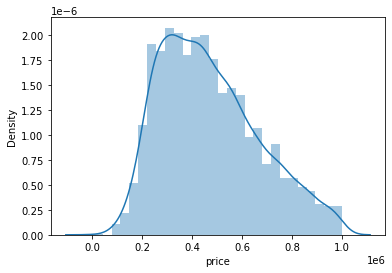

C:\Users\Tsyka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1152x360 with 0 Axes>

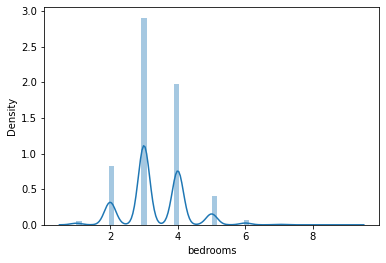

C:\Users\Tsyka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1152x360 with 0 Axes>

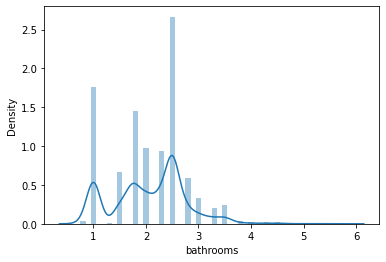

C:\Users\Tsyka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1152x360 with 0 Axes>

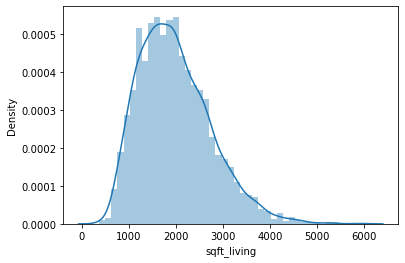

C:\Users\Tsyka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1152x360 with 0 Axes>

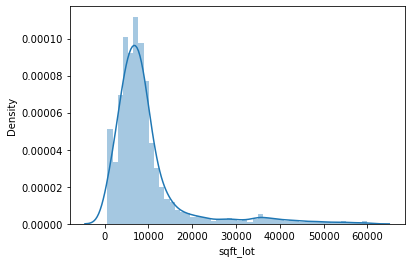

C:\Users\Tsyka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1152x360 with 0 Axes>

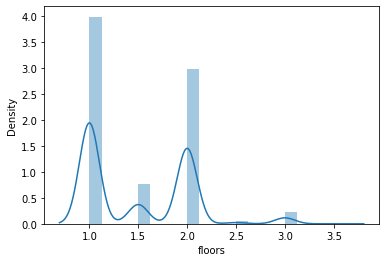

C:\Users\Tsyka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1152x360 with 0 Axes>

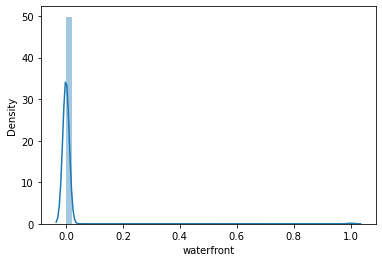

C:\Users\Tsyka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1152x360 with 0 Axes>

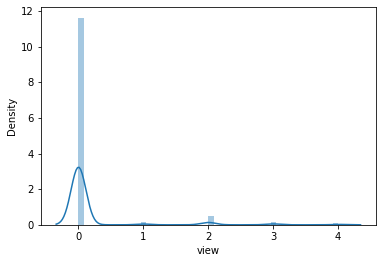

C:\Users\Tsyka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1152x360 with 0 Axes>

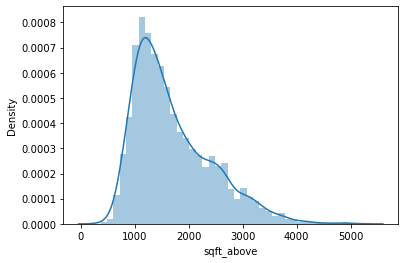

C:\Users\Tsyka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1152x360 with 0 Axes>

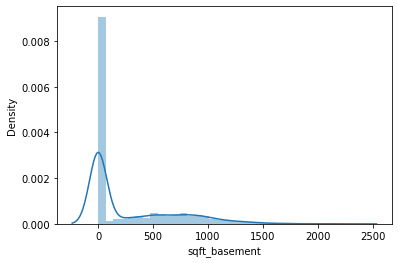

In [262]:
distplot_viz(data_viz)

<h2>Préparation du modèle</h2>

In [263]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [285]:
data_viz[['sqft_living','sqft_basement']]=data_viz[['sqft_living','sqft_basement']]/10.764
data_viz[['sqft_living','sqft_basement']]

,sqft_living,sqft_basement
0,124.489038,0.000000
2,179.301375,0.000000
3,185.804534,92.902267
4,180.230398,74.321813
5,81.753995,0.000000
...,...,...
4595,140.282423,0.000000
4596,135.637310,0.000000
4597,279.635823,0.000000
4598,194.165738,94.760312


In [265]:
X = data_viz[['bedrooms','bathrooms','sqft_living','floors','waterfront','view','sqft_basement']]
y = data_viz['price']

In [266]:
X

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_basement
0,3.0,1.50,124.489038,1.5,0,0,0.000000
2,3.0,2.00,179.301375,1.0,0,0,0.000000
3,3.0,2.25,185.804534,1.0,0,0,92.902267
4,4.0,2.50,180.230398,1.0,0,0,74.321813
5,2.0,1.00,81.753995,1.0,0,0,0.000000
...,...,...,...,...,...,...,...
4595,3.0,1.75,140.282423,1.0,0,0,0.000000
4596,3.0,2.50,135.637310,2.0,0,0,0.000000
4597,3.0,2.50,279.635823,2.0,0,0,0.000000
4598,4.0,2.00,194.165738,1.0,0,0,94.760312


In [267]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

In [320]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge

In [321]:
model_SVR_linear = SVR(kernel="linear")
model_SVR_rbf = SVR(kernel="rbf")
model_lin_reg = LinearRegression()
model_SGD_reg = SGDRegressor()
model_lasso = linear_model.Lasso()
model_elastic = ElasticNet()
model_ridge = Ridge()

In [326]:
def accuracy(model):
    model.fit(X_train, y_train)
    score = model.score(X_test,y_test)
    return score

In [327]:
models=[model_SVR_linear, model_SVR_rbf, model_lin_reg,  model_SGD_reg, model_lasso, model_elastic,model_ridge, ]

In [328]:
for model in models:
    print(f'Le score du model {model} est de {accuracy(model)}')    

Le score du model SVR(kernel='linear') est de 0.37000864388785026
Le score du model SVR() est de -0.030222820410651163
Le score du model LinearRegression() est de 0.3900807597578365
Le score du model SGDRegressor() est de -1153707854441457.5
Le score du model Lasso() est de 0.3900782857660301
Le score du model ElasticNet() est de 0.38498865980783425
Le score du model Ridge() est de 0.3900414461692461


In [276]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score


In [278]:
y_pred = model_lin_reg.predict(X_test)

In [279]:
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

125929.27728803676
24403982454.95015
0.3900807597578365


In [280]:
def prediction_house(X):
    X_test = X
    pred = reg.predict(X_test)
    return pred.tolist()

In [281]:
prediction_house([[1,1,1,1,1,1,1]])

C:\Users\Tsyka\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


[269097.62605118396]

In [282]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.compose import make_column_selector as selector


In [283]:
def creation_pipeline(df):
    numeric_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])

    preprocessor = ColumnTransformer(transformers=[
        ('num', numeric_transformer, selector(dtype_include=["int", "float"]))
    ],remainder='passthrough')

    reg = Pipeline(steps=[('preprocessor',
                        preprocessor), ('regressor', LinearRegression())])
    return reg

In [284]:
creation_pipeline(data_viz)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001741D946DF0>)])),
                ('regressor', LinearRegression())])